**Overview** 
A simple tutorial to classify skin lesions based on the image

**Original Data Source** 

**Original Challenge:** https://challenge2018.isic-archive.com https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/DBW86T 
[1] Noel Codella, Veronica Rotemberg, Philipp Tschandl, M. Emre Celebi, Stephen Dusza, David Gutman, Brian Helba, Aadi Kalloo, Konstantinos Liopyris, Michael Marchetti, Harald Kittler, Allan Halpern: “Skin Lesion Analysis Toward Melanoma Detection 2018: A Challenge Hosted by the International Skin Imaging Collaboration (ISIC)”, 2018; https://arxiv.org/abs/1902.03368 

[2] Tschandl, P., Rosendahl, C. & Kittler, H. The HAM10000 dataset, a large collection of multi-source dermatoscopic images of common pigmented skin lesions. Sci. Data 5, 180161 doi:10.1038/sdata.2018.161 (2018). 

**From Authors** Training of neural networks for automated diagnosis of pigmented skin lesions is hampered by the small size and lack of diversity of available dataset of dermatoscopic images. We tackle this problem by releasing the HAM10000 ("Human Against Machine with 10000 training images") dataset. 

We collected dermatoscopic images from different populations, acquired and stored by different modalities. The final dataset consists of 10015 dermatoscopic images which can serve as a training set for academic machine learning purposes. Cases include a representative collection of all important diagnostic categories in the realm of pigmented lesions: Actinic keratoses and intraepithelial carcinoma / Bowen's disease (akiec), basal cell carcinoma (bcc), benign keratosis-like lesions (solar lentigines / seborrheic keratoses and lichen-planus like keratoses, bkl), dermatofibroma (df), melanoma (mel), melanocytic nevi (nv) and vascular lesions (angiomas, angiokeratomas, pyogenic granulomas and hemorrhage, vasc). 
More than 50% of lesions are confirmed through histopathology (histo), the ground truth for the rest of the cases is either follow-up examination (followup), expert consensus (consensus), or confirmation by in-vivo confocal microscopy (confocal). The dataset includes lesions with multiple images, which can be tracked by the lesionid-column within the HAM10000_metadata file. The test set is not public, but the evaluation server remains running (see the challenge website). Any publications written using the HAM10000 data should be evaluated on the official test set hosted there, so that methods can be fairly compared.


# Mount Google Drive

Mount the Google Drive. Basic step to make sure your Google Colab and your Google Drive is connected. Useful for accessing files & folders from your drive. By default Google provides you 20GB space. I think it is $2/month for an additional 100 GB storage

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0


Installing pytorch

In [3]:
!pip install torch==1.7.1+cu110 torchvision==0.8.2+cu110 torchaudio==0.7.2 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |███████████████████████         | 834.1MB 1.3MB/s eta 0:04:07tcmalloc: large alloc 1147494400 bytes == 0x55cea8f66000 @  0x7ff378b06615 0x55ce6ff2606c 0x55ce70005eba 0x55ce6ff28e8d 0x55ce7001a99d 0x55ce6ff9cfe9 0x55ce6ff97b0e 0x55ce6ff2a77a 0x55ce6ff9ce50 0x55ce6ff97b0e 0x55ce6ff2a77a 0x55ce6ff9986a 0x55ce7001b7c6 0x55ce6ff98ee2 0x55ce7001b7c6 0x55ce6ff98ee2 0x55ce7001b7c6 0x55ce6ff98ee2 0x55ce7001b7c6 0x55ce7009d431 0x55ce6fffe049 0x55ce6ff68c84 0x55ce6ff298e9 0x55ce6ff9dade 0x55ce6ff2a69a 0x55ce6ff98a45 0x55ce6ff97e0d 0x55ce6ff2a77a 0x55ce6ff98a45 0x55ce6ff2a69a 0x55ce6ff98a45
     |█████████████████████████████▏  | 1055.7MB 1.2MB/s eta 0:01:22tcmalloc: large alloc 1434370048 bytes == 0x55ceed5bc000 @  0x7ff378b06615 0x55ce6ff2606c 0x55ce70005eba 0x55ce6ff28e8d 0x55ce7001a99d 0x55ce6ff9cfe9 0x55ce6ff97b0e 0x55ce6ff2a77a 0x55ce6ff9ce50 0x55ce6ff97b0e 0x55ce6ff2a77a 0x55ce6ff9986a 0x55ce7001b7c6 0x55ce6ff98ee2 0

In [4]:
!pip install efficientnet_pytorch tez

  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.0-cp37-none-any.whl size=16031 sha256=e5046f7307482bdf2f30d9ef4fa10c29789caaa429926cee2ed7d97cfd2195f8
  Stored in directory: /root/.cache/pip/wheels/e9/c6/e1/7a808b26406239712cfce4b5ceeb67d9513ae32aa4b31445c6
Successfully built efficientnet-pytorch


In [1]:
# os.getcwd()
import os
path = "/content/drive/MyDrive/sgmoid_education/computer vision 2D/ophthalmology/"
os.chdir(path)

In [2]:
from sgmoid_education import *

In [3]:
ophthalmology_data = np.load(path + 'retinamnist.npz')
lst = ophthalmology_data.files
print(lst)
# for item in lst:
#     print(item)
#     print(data[item])

['train_images', 'val_images', 'test_images', 'train_labels', 'val_labels', 'test_labels']


In [4]:
print(f"Train data size: {ophthalmology_data['train_images'].shape[0]}")
print(f"Validation data size: {ophthalmology_data['val_images'].shape[0]}")
print(f"Test data size: {ophthalmology_data['test_images'].shape[0]}")
print(f"Input image size: {ophthalmology_data['train_images'].shape[1:]}")

Train data size: 1080
Validation data size: 120
Test data size: 400
Input image size: (28, 28, 3)


In [5]:
train_dataset = ImageDataset(images=ophthalmology_data['train_images'], 
                             targets=ophthalmology_data['train_labels'].reshape(-1))

val_dataset = ImageDataset(images=ophthalmology_data['val_images'], 
                           targets=ophthalmology_data['val_labels'].reshape(-1))

test_dataset = ImageDataset(images=ophthalmology_data['test_images'], 
                            targets=ophthalmology_data['test_labels'].reshape(-1))


In [6]:
classes=len(set(ophthalmology_data['val_labels'].reshape(-1)))
classes

5

## Visualize Batch

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


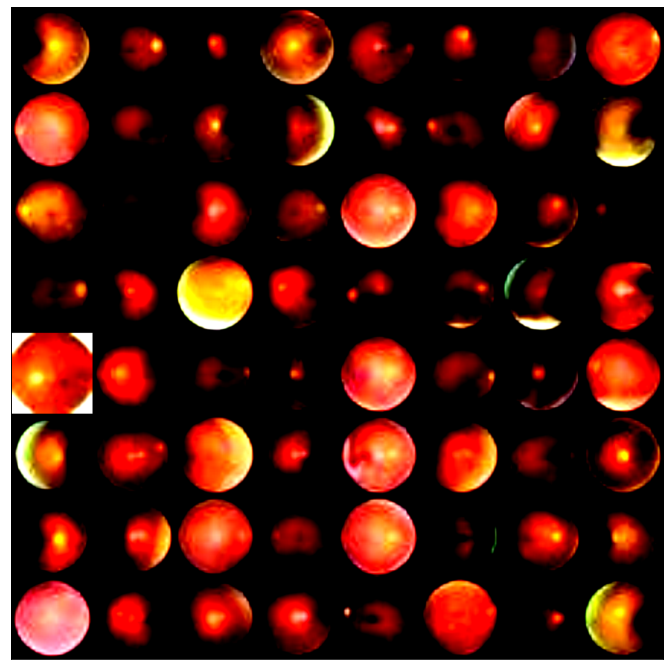

In [7]:
show_batch(DataLoader(train_dataset, batch_size=64, shuffle=True))

In [8]:
model = ImageClassifier(num_classes=classes)

Loaded pretrained weights for efficientnet-b0


tez = a wrapper that provides the training loop & model callbacks efficiently

In [9]:
es = tez.callbacks.EarlyStopping(monitor="valid_accuracy", 
                                 model_path=path + "model.bin", 
                                 patience=5, 
                                 mode="max")

model.fit(train_dataset=train_dataset, valid_dataset=val_dataset,
    train_bs = 32,
    valid_bs = 32,
    callbacks=[es],
    fp16=True,
    epochs=30,
    device="cuda"
)

  0%|          | 0/34 [00:00<?, ?it/s]

Validation score improved (-inf --> 0.16927083333333334). Saving model!


  0%|          | 0/34 [00:00<?, ?it/s]

EarlyStopping counter: 1 out of 5


  0%|          | 0/34 [00:00<?, ?it/s]

Validation score improved (0.16927083333333334 --> 0.17708333333333334). Saving model!


  0%|          | 0/34 [00:00<?, ?it/s]

EarlyStopping counter: 1 out of 5


  0%|          | 0/34 [00:00<?, ?it/s]

Validation score improved (0.17708333333333334 --> 0.1796875). Saving model!


  0%|          | 0/34 [00:00<?, ?it/s]

Validation score improved (0.1796875 --> 0.2604166666666667). Saving model!


  0%|          | 0/34 [00:00<?, ?it/s]

Validation score improved (0.2604166666666667 --> 0.3151041666666667). Saving model!


  0%|          | 0/34 [00:00<?, ?it/s]

Validation score improved (0.3151041666666667 --> 0.3619791666666667). Saving model!


  0%|          | 0/34 [00:00<?, ?it/s]

Validation score improved (0.3619791666666667 --> 0.3776041666666667). Saving model!


  0%|          | 0/34 [00:00<?, ?it/s]

Validation score improved (0.3776041666666667 --> 0.4427083333333333). Saving model!


  0%|          | 0/34 [00:00<?, ?it/s]

Validation score improved (0.4427083333333333 --> 0.4505208333333333). Saving model!


  0%|          | 0/34 [00:00<?, ?it/s]

EarlyStopping counter: 1 out of 5


  0%|          | 0/34 [00:00<?, ?it/s]

EarlyStopping counter: 2 out of 5


  0%|          | 0/34 [00:00<?, ?it/s]

EarlyStopping counter: 3 out of 5


  0%|          | 0/34 [00:00<?, ?it/s]

Validation score improved (0.4505208333333333 --> 0.46875). Saving model!


  0%|          | 0/34 [00:00<?, ?it/s]

EarlyStopping counter: 1 out of 5


  0%|          | 0/34 [00:00<?, ?it/s]

EarlyStopping counter: 2 out of 5


  0%|          | 0/34 [00:00<?, ?it/s]

Validation score improved (0.46875 --> 0.48697916666666663). Saving model!


  0%|          | 0/34 [00:00<?, ?it/s]

Validation score improved (0.48697916666666663 --> 0.5052083333333334). Saving model!


  0%|          | 0/34 [00:00<?, ?it/s]

Validation score improved (0.5052083333333334 --> 0.5286458333333334). Saving model!


  0%|          | 0/34 [00:00<?, ?it/s]

Validation score improved (0.5286458333333334 --> 0.5442708333333334). Saving model!


  0%|          | 0/34 [00:00<?, ?it/s]

EarlyStopping counter: 1 out of 5


  0%|          | 0/34 [00:00<?, ?it/s]

Validation score improved (0.5442708333333334 --> 0.5546875). Saving model!


  0%|          | 0/34 [00:00<?, ?it/s]

Validation score improved (0.5546875 --> 0.5625). Saving model!


  0%|          | 0/34 [00:00<?, ?it/s]

EarlyStopping counter: 1 out of 5


  0%|          | 0/34 [00:00<?, ?it/s]

Validation score improved (0.5625 --> 0.5703125). Saving model!


  0%|          | 0/34 [00:00<?, ?it/s]

Validation score improved (0.5703125 --> 0.578125). Saving model!


  0%|          | 0/34 [00:00<?, ?it/s]

EarlyStopping counter: 1 out of 5


  0%|          | 0/34 [00:00<?, ?it/s]

EarlyStopping counter: 2 out of 5


100%|██████████| 4/4 [00:00<00:00,  5.00it/s, accuracy=0.578, loss=1.11, stage=valid]

EarlyStopping counter: 3 out of 5


# Performance Metric

In [10]:
prediction(model, train_dataset, "train")
prediction(model, val_dataset, "val")
prediction(model, test_dataset, "test")

Accuracy on train: 62.69%
Accuracy on val: 55.00%
Accuracy on test: 54.50%


In [12]:
plot_confusion_matrix(model, test_dataset, labels=['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc'])

In [ ]:
date = pd.to_datetime("27th of January, 1756")

In [ ]:
date

Timestamp('1756-01-27 00:00:00')